In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
import math
%matplotlib inline

In [2]:
DF_smiles = pd.read_csv('DF_GI50_IC50_groupedSanitizedChosen.csv')

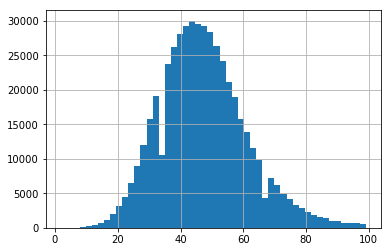

In [3]:
plt.hist(DF_smiles.loc[:, 'smilesLength'], bins = 50)
plt.grid()
plt.show()

In [4]:
DF_smiles.tail(5)

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean,canonicalSmiles,negativeCharged,positiveCharged,elementsSet,numberOfRings,organicChemistryElementsOnly,smilesLength,encodedSmiles
496157,1976555,1,CNC(=O)c1cc2cc(Nc3nccc(n3)c4cc(COC)ccn4)cc(Cl)...,34.40,34.40,34.40,34.40,34.40,34.40,CNC(=O)c1cc2cc(Nc3nccc(-c4cc(COC)ccn4)n3)cc(Cl...,0.0,0.0,"['Cl', 'N', 'C', 'O']",4.0,True,54,CNC(=O)c1cc2cc(Nc3nccc(-c4cc(COC)ccn4)n3)cc(U)...
496158,1976556,1,CNC(=O)c1cc2cc(Nc3nccc(n3)c4cc(COC)ccn4)cc(C)c...,7.20,7.20,7.20,7.20,7.20,7.20,CNC(=O)c1cc2cc(Nc3nccc(-c4cc(COC)ccn4)n3)cc(C)...,0.0,0.0,"['N', 'C', 'O']",4.0,True,53,CNC(=O)c1cc2cc(Nc3nccc(-c4cc(COC)ccn4)n3)cc(C)...
496159,1976557,1,COC1=CC2=C(C)NC(=O)C(=C2C=C1OC)Cc3cccc(Oc4cccc...,140.00,140.00,140.00,140.00,140.00,140.00,COc1cc2c(C)[nH]c(=O)c(Cc3cccc(Oc4ccccc4)c3)c2c...,0.0,0.0,"['N', 'C', 'O']",4.0,True,50,COc1cc2c(C)Wc(=O)c(Cc3cccc(Oc4ccccc4)c3)c2cc1OC
496160,1976558,1,CCC1=C2C=C(OC)C(=CC2=C(Cc3ccc4oc5ccccc5c4c3)C(...,0.12,0.12,0.12,0.12,0.12,0.12,CCc1[nH]c(=O)c(Cc2ccc3oc4ccccc4c3c2)c2cc(OC)c(...,0.0,0.0,"['N', 'C', 'O']",5.0,True,53,CCc1Wc(=O)c(Cc2ccc3oc4ccccc4c3c2)c2cc(OC)c(OC)...
496161,1976559,1,CCCC1=C2C=C(OC)C(=CC2=C(Cc3ccc4oc5ccccc5c4c3)C...,0.50,0.50,0.50,0.50,0.50,0.50,CCCc1[nH]c(=O)c(Cc2ccc3oc4ccccc4c3c2)c2cc(OC)c...,0.0,0.0,"['N', 'C', 'O']",5.0,True,54,CCCc1Wc(=O)c(Cc2ccc3oc4ccccc4c3c2)c2cc(OC)c(OC...


In [5]:
DF_smiles.loc[:, 'encodedSmilesPostprocessed'] = DF_smiles.loc[:, 'encodedSmiles'].map(lambda x: x+'Q')

In [6]:
DF_smiles.head(10)

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean,canonicalSmiles,negativeCharged,positiveCharged,elementsSet,numberOfRings,organicChemistryElementsOnly,smilesLength,encodedSmiles,encodedSmilesPostprocessed
0,23,12,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,100.0000,34000.0000,10724.0775,-5.00,140.00,27.733333,O=C1OC(=CBr)CCC1c1cccc2ccccc12,0.0,0.0,"['C', 'Br', 'O']",3.0,True,30,O=C1OC(=CG)CCC1c1cccc2ccccc12,O=C1OC(=CG)CCC1c1cccc2ccccc12Q
1,24,1,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,30.0000,30.0000,30.0000,30.00,30.00,30.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"['O', 'C', 'I']",3.0,True,29,O=C1OC(=CI)CCC1c1cccc2ccccc12,O=C1OC(=CI)CCC1c1cccc2ccccc12Q
2,25,1,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,95.0000,95.0000,95.0000,95.00,95.00,95.000000,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1,0.0,0.0,"['C', 'O']",3.0,True,33,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1Q
3,26,1,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,190.0000,190.0000,190.0000,190.00,190.00,190.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"['O', 'C', 'I']",3.0,True,29,O=C1OC(=CI)CCC1c1cccc2ccccc12,O=C1OC(=CI)CCC1c1cccc2ccccc12Q
4,31,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4CC4c5c...,0.5129,0.5129,0.5129,9.29,9.29,9.290000,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...,0.0,0.0,"['N', 'C', 'O']",5.0,True,51,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...
5,33,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)S(=O)(=O)c4cccs4,33.8800,33.8800,33.8800,7.47,7.47,7.470000,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC,0.0,0.0,"['S', 'N', 'C', 'O']",4.0,True,49,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc...
6,58,1,COC(=O)\C=C\C(=O)Nc1ccc(CCCCC(=O)N2CCN(CC2)c3n...,4.4670,4.4670,4.4670,8.35,8.35,8.350000,COC(=O)C=CC(=O)Nc1ccc(CCCCC(=O)N2CCN(c3nc(N)c4...,0.0,0.0,"['N', 'C', 'O']",4.0,True,70,COC(=O)C=CC(=O)Nc1ccc(CCCCC(=O)N2CCN(c3nc(N)c4...,COC(=O)C=CC(=O)Nc1ccc(CCCCC(=O)N2CCN(c3nc(N)c4...
7,59,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)CCc4ccccc4,3.3880,3.3880,3.3880,8.47,8.47,8.470000,COc1cc2nc(N3CCN(C(=O)CCc4ccccc4)CC3)nc(N)c2cc1OC,0.0,0.0,"['N', 'C', 'O']",4.0,True,48,COc1cc2nc(N3CCN(C(=O)CCc4ccccc4)CC3)nc(N)c2cc1OC,COc1cc2nc(N3CCN(C(=O)CCc4ccccc4)CC3)nc(N)c2cc1OCQ
8,60,1,COc1ccc(\C=C\C(=O)N2CCN(CC2)c3nc(N)c4cc(OC)c(O...,3.3880,3.3880,3.3880,8.47,8.47,8.470000,COc1ccc(C=CC(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n...,0.0,0.0,"['N', 'C', 'O']",4.0,True,55,COc1ccc(C=CC(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n...,COc1ccc(C=CC(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n...
9,61,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)\C=C\c4c...,20.8900,20.8900,20.8900,7.68,7.68,7.680000,COc1cc2nc(N3CCN(C(=O)C=Cc4cccc(F)c4)CC3)nc(N)c...,0.0,0.0,"['F', 'N', 'C', 'O']",4.0,True,52,COc1cc2nc(N3CCN(C(=O)C=Cc4cccc(F)c4)CC3)nc(N)c...,COc1cc2nc(N3CCN(C(=O)C=Cc4cccc(F)c4)CC3)nc(N)c...


In [7]:
from functools import reduce
def provideSampleCharset(data):
    structures = data.tolist()
    charset = list(reduce(lambda x, y: set(y) | x, structures, set()))
    return(charset)

In [8]:
print(provideSampleCharset(DF_smiles.loc[:, 'encodedSmilesPostprocessed']))

['Q', 'U', '5', '-', 'W', 'N', ']', 's', '.', 'P', 'C', '#', '(', 'S', 'H', 'o', 'G', 'O', 'B', 'F', '1', 'c', '3', '[', 'n', '=', 'I', '2', '4', ')']


## Sample the Data Frame and concatenate the smiles into single string

In [10]:
import random
nSample = 10000
corpus = DF_smiles.loc[random.sample(list(DF_smiles.index), nSample), 'encodedSmilesPostprocessed'].str.cat(sep = '')
#corpus = DF_smiles.loc[1000:2000, 'encodedSmilesPostprocessed'].str.cat(sep = '')

In [11]:
print('Length of corpus ', len(corpus))

Length of corpus  476910


### Sanity check

In [ ]:
corpus[:200]

In [ ]:
print(DF_smiles.loc[1000, 'encodedSmilesPostprocessed'])
print(DF_smiles.loc[1001, 'encodedSmilesPostprocessed'])
print(DF_smiles.loc[1002, 'encodedSmilesPostprocessed'])

## Create the input for RNN

In [12]:
chars = sorted(list(set(corpus)))
print('total chars:', len(chars))
charToIndices = dict((c, i) for i, c in enumerate(chars))
indicesToChar = dict((i, c) for i, c in enumerate(chars))

total chars: 30


In [13]:
print(chars)

['#', '(', ')', '-', '.', '1', '2', '3', '4', '5', '=', 'B', 'C', 'F', 'G', 'H', 'I', 'N', 'O', 'P', 'Q', 'S', 'U', 'W', '[', ']', 'c', 'n', 'o', 's']


### Predictors/response preparation

In [14]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
nextChars = []
for iii in range(0, len(corpus) - maxlen, step):
    sentences.append(corpus[iii: iii + maxlen])
    nextChars.append(corpus[iii + maxlen])
print('number of sequences:', len(sentences))

number of sequences: 158957


#### Sanity check

In [ ]:
for iii in range(10):
    print(sentences[iii])
    print(nextChars[iii])

In [ ]:
corpus[:200]

### Vectorization

In [15]:
print('Vectorization...')
predictors = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
response = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for iii, sentence in enumerate(sentences):
    for jjj, char in enumerate(sentence):
        predictors[iii, jjj, charToIndices[char]] = 1
    response[iii, charToIndices[nextChars[iii]]] = 1

Vectorization...


#### Sanity check

In [ ]:
for iii in range(maxlen):
    print(iii, predictors[0, iii, :], indicesToChar[np.argmax(predictors[0, iii, :])])

In [ ]:
sample = 2
print(iii, response[sample, :], indicesToChar[np.argmax(response[sample, :])])

In [16]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
import sys

Using TensorFlow backend.


In [17]:
print(maxlen, len(chars))

40 30


In [18]:
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars)), return_sequences = True))
#model.add(LSTM(40, input_shape=(maxlen, len(chars)), return_sequences = True))
#model.add(Dropout(0.1))
model.add(LSTM(40, return_sequences = False))
#model.add(Dropout(0.2))
#model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

Build model...


In [19]:
optimizer = RMSprop(lr=0.002)
#optimizer = Adam(lr=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 128)           81408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                27040     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
Total params: 109,678
Trainable params: 109,678
Non-trainable params: 0
_________________________________________________________________


In [21]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [22]:
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    #start_index = random.randint(0, len(corpus) - maxlen - 1)
    start_index = 0
    seedSize = 10
    for diversity in [0.0, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = corpus[start_index: start_index + seedSize]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        foundTerminatingCharacter = False
        iii = 0
        maxPredictionLength = 150
        while (not foundTerminatingCharacter):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, charToIndices[char]] = 1.
            
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indicesToChar[next_index]
            
            generated += next_char
            sentence = sentence[1:] + next_char
            
            iii += 1
            if (next_char == 'Y' or len(generated) == 150):
                foundTerminatingCharacter = True
            
            sys.stdout.write(next_char)
            sys.stdout.flush()
        
        print()

In [23]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [25]:
def step_decay(epoch):
    initial_lrate = 0.002
    # 0.7 sounds like an optimal choice
    drop = 0.7
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [26]:
def exp_decay(epoch):
   initial_lrate = 0.01
   k = 0.05
   lrate = initial_lrate * np.exp(-k*epoch)
   return lrate

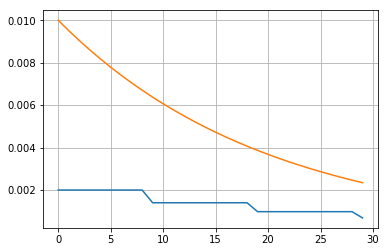

In [27]:
domain = np.linspace(start=0, stop=30, num=30, endpoint=False)
funcValuesExp = exp_decay(domain)
funcValuesStep = [step_decay(item) for item in domain]
plt.plot(domain, funcValuesStep)
plt.plot(domain, funcValuesExp)
plt.grid()
plt.show()


In [28]:
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)

In [29]:
import keras
import keras.backend as K

class Histories(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.aucs = []
        self.losses = []

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        #lr = optimizer.lr
        #print('\nLR epoch beg: {:.6f}\n'.format(lr))
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr)
        print('\nLR before the epoch: {:.6f}\n'.format(lr))
        return

    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        #self.model.optimizer.lr = self._step_decay(epoch)
        lr = K.eval(optimizer.lr)
        print('\nLR just set up: {:.6f}\n'.format(lr))
        return
        
    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return
    
    def _step_decay(self, epoch):
        initial_lrate = 0.01
        drop = 0.5
        epochs_drop = 5.0
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate

In [30]:
histories = Histories()

In [31]:
callbacks_list = [histories, lrate]

In [32]:
history = model.fit(predictors, response,
          batch_size=256,
          epochs=40,
          callbacks=callbacks_list)


LR before the epoch: 0.002000

Epoch 1/40
158720/158957 [============================>.] - ETA: 0s - loss: 1.7350 - acc: 0.4599
LR just set up: 0.002000

158957/158957 [==============================] - 365s - loss: 1.7342 - acc: 0.4602   

LR before the epoch: 0.002000

Epoch 2/40
158720/158957 [============================>.] - ETA: 0s - loss: 1.2357 - acc: 0.5994
LR just set up: 0.002000

158957/158957 [==============================] - 360s - loss: 1.2357 - acc: 0.5994   

LR before the epoch: 0.002000

Epoch 3/40
158720/158957 [============================>.] - ETA: 0s - loss: 1.1000 - acc: 0.6380
LR just set up: 0.002000

158957/158957 [==============================] - 359s - loss: 1.1000 - acc: 0.6380   

LR before the epoch: 0.002000

Epoch 4/40
158720/158957 [============================>.] - ETA: 0s - loss: 1.0266 - acc: 0.6578
LR just set up: 0.002000

158957/158957 [==============================] - 373s - loss: 1.0266 - acc: 0.6579   

LR before the epoch: 0.002000

Epoc

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

### Save model

In [33]:
modelName = 'sample_5000_after40_loss_0.5309_acc_0.8190'

In [34]:
# serialize model to JSON
model_json = model.to_json()
with open(modelName+'.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(modelName+'.h5')
print("Saved model to disk")

Saved model to disk


### Read model

In [ ]:
from keras.models import model_from_json
json_file = open(modelName+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(modelName+'.h5')
print("Loaded model from disk")

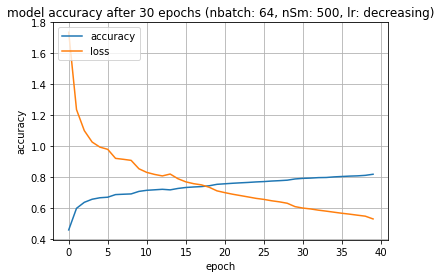

In [35]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy after 30 epochs (nbatch: 64, nSm: 500, lr: decreasing)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.grid()
plt.show()

In [36]:
def generateStringFromModel(model, seed, maxLength, chars, terminatingChar, diversity):
    foundTerminatingCharacter = False
    iii = 0
    generated = seed
    while (not foundTerminatingCharacter):
        
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(seed):
            x_pred[0, t, charToIndices[char]] = 1.
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, 1.0)
        next_char = indicesToChar[next_index]
            
        generated += next_char
        #seed = seed[1:] + next_char
        if (len(seed) < 40):
            seed = seed + next_char
        else:
            seed = seed[1:] + next_char
            
        iii += 1
        if (next_char == terminatingChar or len(generated) == maxLength):
            foundTerminatingCharacter = True
     
    return generated
    #sys.stdout.write(next_char)
    #sys.stdout.flush()           

In [39]:
predictedSmiles = generateStringFromModel(model, 'O=C1OC(=CG)CCC1c1cccc2ccccc12', 100, chars, 'Q', 1.4)

In [40]:
predictedSmilesClean = predictedSmiles.replace('G', 'Br').replace('U', 'Cl').replace('W', '[nH]').replace('Q', '')
predictedSmilesClean

'O=C1OC(=CBr)CCC1c1cccc2ccccc12CCcO(C(FFFF)F)c1ccc(F)cc1'

In [ ]:
import random
seedLength = 30
randPoint = random.randint(0, len(corpus) - seedLength)
seed = corpus[randPoint:(randPoint + seedLength)]

In [ ]:
seed


In [ ]:
for iii in range(20):
    predictedSmiles = generateStringFromModel(model, 'O=C1OC(=CG)C', 100, chars, 'Q', 1)
    predictedSmilesClean = predictedSmiles.replace('G', 'Br').replace('U', 'Cl').replace('W', '[nH]').replace('Q', '')
    mol = Chem.MolFromSmiles(predictedSmilesClean)
    if mol is not None:
        print('CORRECT!!!: '+predictedSmilesClean+' '+str(mol.GetNumAtoms()))
    else:
        print('WRONG!!!: '+predictedSmilesClean)

In [ ]:
model.optimizer.lr.value()

In [ ]:
import keras

In [ ]:
keras.l

In [ ]:
class LrReducer(Callback):
    def __init__(self, patience=0, reduce_rate=0.5, reduce_nb=10, verbose=1):
        super(Callback, self).__init__()
        self.patience = patience
        self.wait = 0
        self.best_score = -1.
        self.reduce_rate = reduce_rate
        self.current_reduce_nb = 0
        self.reduce_nb = reduce_nb
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current_score = logs.get('val_acc')
        if current_score > self.best_score:
            self.best_score = current_score
            self.wait = 0
            if self.verbose > 0:
                print('---current best val accuracy: %.3f' % current_score)
        else:
            if self.wait >= self.patience:
                self.current_reduce_nb += 1
                if self.current_reduce_nb <= 10:
                    lr = self.model.optimizer.lr.get_value()
                    self.model.optimizer.lr.set_value(lr*self.reduce_rate)
                else:
                    if self.verbose > 0:
                        print("Epoch %d: early stopping" % (epoch))
                    self.model.stop_training = True
            self.wait += 1